# _Augmentation_ para expansão do _Dataset_

In [1]:
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.color import label2rgb

import random

In [2]:
from albumentations import (
    Compose,
    VerticalFlip,
    HorizontalFlip,
    Flip,
    RandomRotate90,
    Rotate,
    ShiftScaleRotate,
    CenterCrop,
    OpticalDistortion,
    GridDistortion,
    ElasticTransform,
    JpegCompression,
    HueSaturationValue,
    RGBShift,
    RandomBrightness,
    RandomContrast,
    Blur,
    MotionBlur,
    MedianBlur,
    GaussNoise,
    CLAHE,
    ChannelShuffle,
    InvertImg,
    RandomGamma,
    ToGray,
    PadIfNeeded,
    RandomBrightnessContrast
)

In [3]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2, **kwargs):
    #height, width = img.shape[:2]

    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img

def visualize_titles(img, bbox, title, color=BOX_COLOR, thickness=2, font_thickness = 2, font_scale=0.35, **kwargs):
    #height, width = img.shape[:2]
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    ((text_width, text_height), _) = cv2.getTextSize(title, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, title, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, TEXT_COLOR,
                font_thickness, lineType=cv2.LINE_AA)
    return img


def augment_and_show(aug, image, mask=None, bboxes=[], categories=[], category_id_to_name=[], filename=None, 
                     font_scale_orig=0.35, 
                     font_scale_aug=0.35, show_title=True, **kwargs):

    augmented = aug(image=image, mask=mask, bboxes=bboxes, category_id=categories)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_aug = cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB)

    for bbox in bboxes:
        visualize_bbox(image, bbox, **kwargs)

    for bbox in augmented['bboxes']:
        visualize_bbox(image_aug, bbox, **kwargs)

    if show_title:
        for bbox,cat_id in zip(bboxes, categories):
            visualize_titles(image, bbox, category_id_to_name[cat_id], font_scale=font_scale_orig, **kwargs)
        for bbox,cat_id in zip(augmented['bboxes'], augmented['category_id']):
            visualize_titles(image_aug, bbox, category_id_to_name[cat_id], font_scale=font_scale_aug, **kwargs)

    
    if mask is None:
        f, ax = plt.subplots(1, 2, figsize=(10, 5))
        
        ax[0].imshow(image)
        ax[0].set_title('Imagem Original')
        
        ax[1].imshow(image_aug)
        ax[1].set_title('Imagem com Augmentation')
    else:
        f, ax = plt.subplots(2, 2, figsize=(5, 5))
        
        if len(mask.shape) != 3:
            mask = label2rgb(mask, bg_label=0)            
            mask_aug = label2rgb(augmented['mask'], bg_label=0)
        else:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            mask_aug = cv2.cvtColor(augmented['mask'], cv2.COLOR_BGR2RGB)
            
        ax[0, 0].imshow(image)
        ax[0, 0].set_title('Original image')
        
        ax[0, 1].imshow(image_aug)
        ax[0, 1].set_title('Augmented image')
        
        ax[1, 0].imshow(mask, interpolation='nearest')
        ax[1, 0].set_title('Original mask')

        ax[1, 1].imshow(mask_aug, interpolation='nearest')
        ax[1, 1].set_title('Augmented mask')

    f.tight_layout()
    if filename is not None:
        f.savefig(filename)
        
    return augmented['image'], augmented['mask'], augmented['bboxes']

def find_in_dir(dirname):
    return [os.path.join(dirname, fname) for fname in sorted(os.listdir(dirname))]

In [4]:
random.seed(42)
image = cv2.imread('classificacao1/290.png')

light = Compose([
    RandomBrightnessContrast(p=1),    
    RandomGamma(p=1),    
    CLAHE(p=1),    
], p=1)

medium = Compose([
    CLAHE(p=1),
    HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
], p=1)


strong = Compose([
    ChannelShuffle(p=1),
], p=1)

## Flip Horizontal

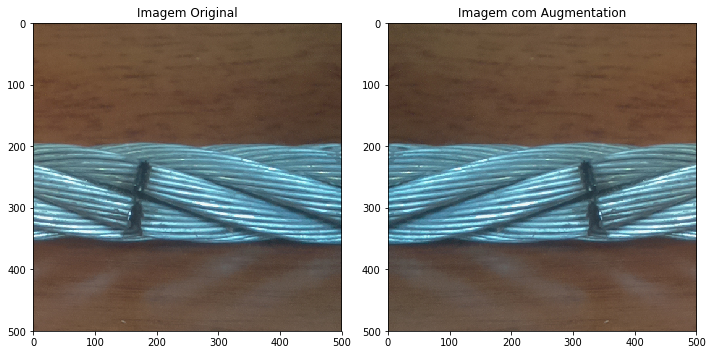

In [86]:
r = augment_and_show(HorizontalFlip(p=1), image)

## Flip Vertical

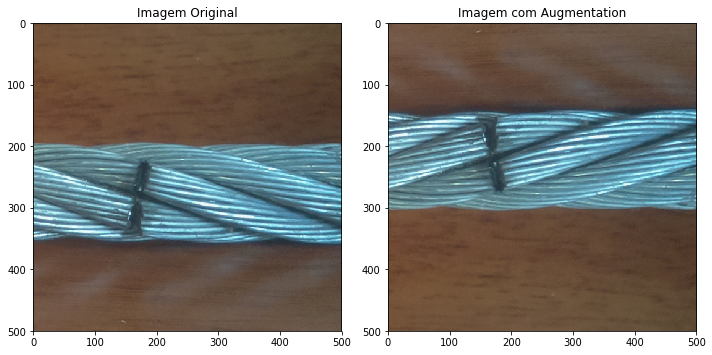

In [87]:
r = augment_and_show(VerticalFlip(p=1), image)

## Flip Vertical + Horizontal

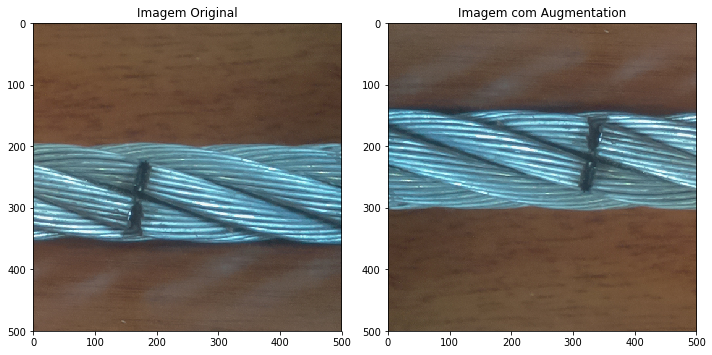

In [88]:
flips = Compose([
    VerticalFlip(p=1),    
    HorizontalFlip(p=1)  
], p=1)
r = augment_and_show(flips, image)

## Center Crop

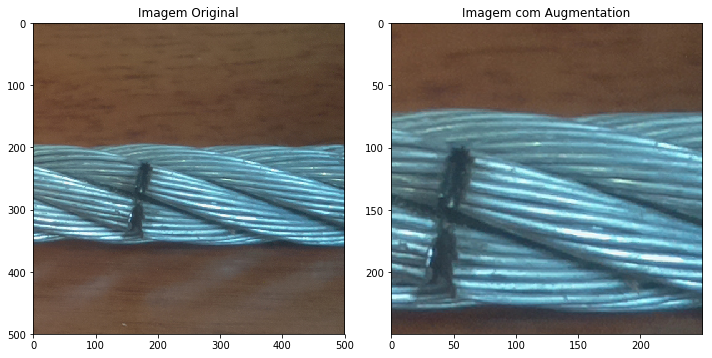

In [89]:
r = augment_and_show(CenterCrop(height=250, width=250, p=1), image)

## JPEG Compression

In [ ]:
r = augment_and_show(JpegCompression(quality_lower=4, quality_upper=100, p=0.5), image)

## Random Contrast

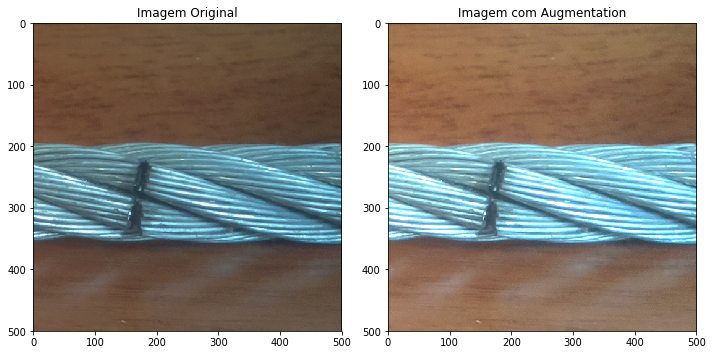

In [95]:
r = augment_and_show(RandomContrast(limit=0.9, p=0.5), image)

## Hue Saturation

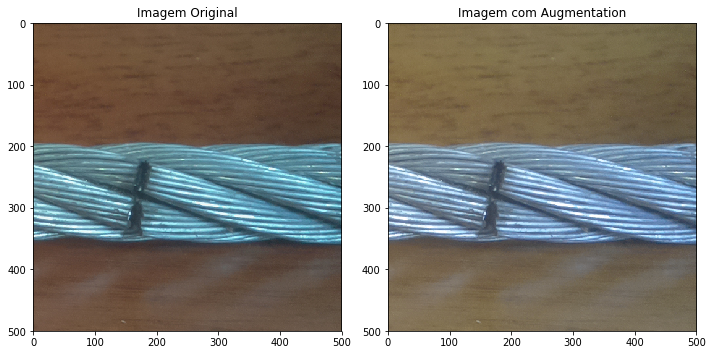

In [122]:
r = augment_and_show(HueSaturationValue(hue_shift_limit=20, sat_shift_limit=20, val_shift_limit=20, p=0.5), image)

## Shift Scale Rotate

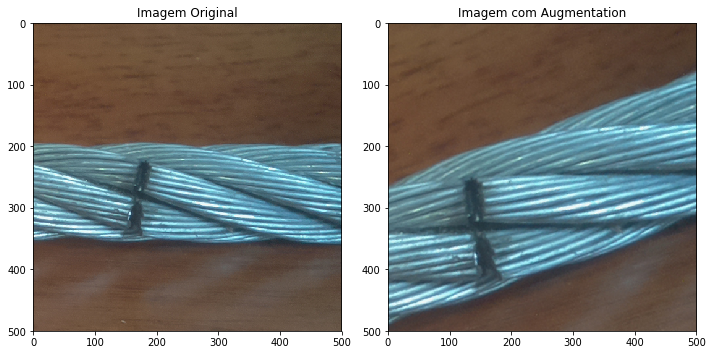

In [130]:
r = augment_and_show(ShiftScaleRotate(shift_limit=0.2, scale_limit=1.4, rotate_limit=20, p=0.5), image)

## CLAHE

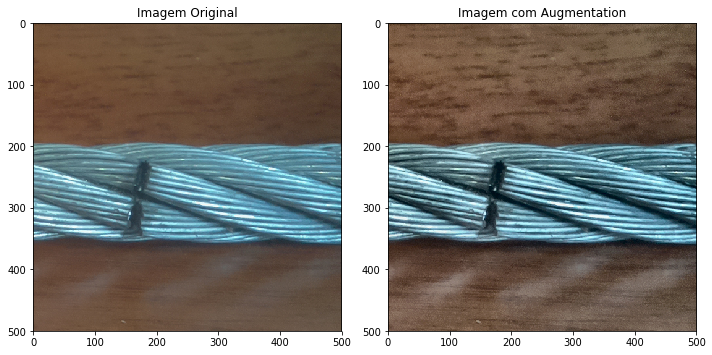

In [5]:
r = augment_and_show(light, image)